In [1]:
from helpers import get_env
import openai
from openai.embeddings_utils import get_embedding
import numpy as np

API_KEY, RESOURCE_ENDPOINT = get_env("azure-openai")

openai.api_type = "azure"
openai.api_key = API_KEY
openai.api_base = RESOURCE_ENDPOINT
openai.api_version = "2022-12-01"

In [43]:
a = "unanswerable"
b = "There is no information provided in the given context to answer this question."
c = "I dont know"
d = "GPT-4 played in the finals."

In [44]:
a1_embedding = get_embedding(a, engine="text-embedding-ada-002")
b1_embedding = get_embedding(b, engine="text-embedding-ada-002")
c1_embedding = get_embedding(c, engine="text-embedding-ada-002")
d1_embedding = get_embedding(d, engine="text-embedding-ada-002")

In [45]:
matrix = np.array([a1_embedding, b1_embedding, c1_embedding, d1_embedding])

In [46]:
# reduce the dimensionality of the embeddings
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, perplexity=1, random_state=42, init='random', learning_rate=200)
vis_dims = tsne.fit_transform(matrix)
vis_dims.shape

(4, 2)

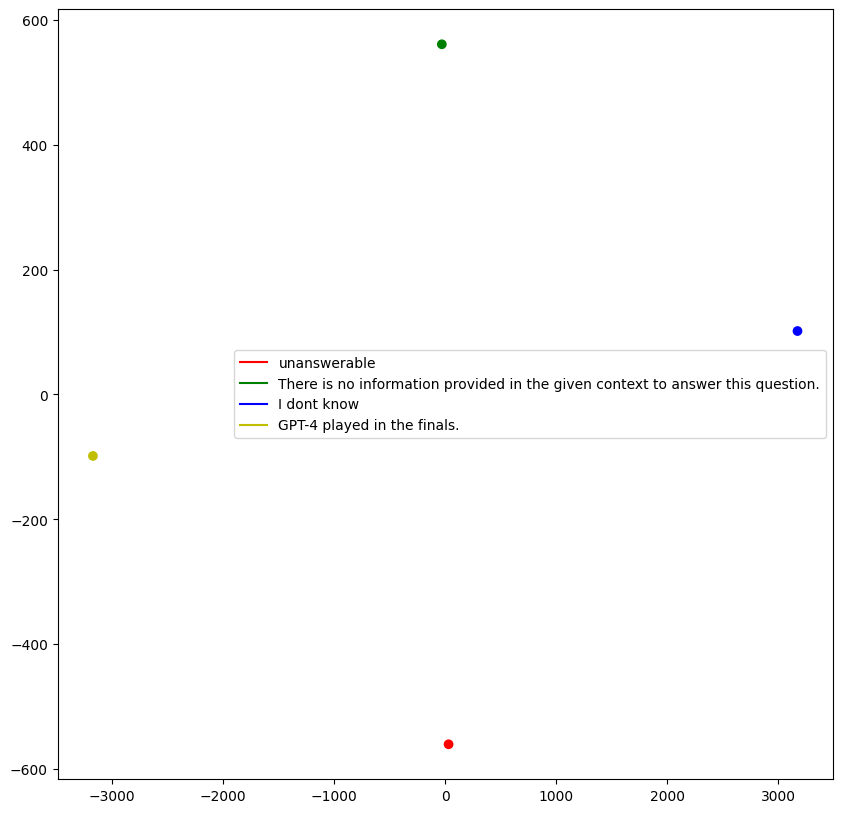

In [47]:
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['figure.figsize'] = (10, 10)

plt.scatter(vis_dims[:, 0], vis_dims[:, 1], c=['r', 'g', 'b', 'y'])
# legend for the colors and its sentences
lines = [plt.plot([], [], color=clr)[0] for clr in ['r', 'g', 'b', 'y']]
labels = [a, b, c, d]
plt.legend(lines, labels)
plt.show()

In [ ]:
# GloVe

VOCAB_SIZE = glove.shape[0]
EMBEDDING_DIMENS = glove.shape[1]

print('GLOVE')
print('VOCAB_SIZE: ', VOCAB_SIZE)
print('EMBEDDING_DIMENS: ', EMBEDDING_DIMENS)

GRU_UNITS = 100

In [ ]:
import torch
import torch.nn as nn

class BiGRU(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers):
        super(BiGRU, self).__init__()
        self.num_layers = num_layers
        self.hidden_dim = hidden_dim
        self.gru = nn.GRU(input_size=input_dim, hidden_size=hidden_dim, num_layers=num_layers, 
                          batch_first=True, bidirectional=True)
        
    def forward(self, x):
        h0 = torch.zeros(self.num_layers*2, x.size(0), self.hidden_dim).to(x.device)
        output, _ = self.gru(x, h0)
        return output

class TotalModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim, gru_units):
        super(TotalModel, self).__init__()
        self.embedding = nn.Embedding(num_embeddings=vocab_size, embedding_dim=embedding_dim)
        self.gru = BiGRU(input_dim=embedding_dim, hidden_dim=gru_units, num_layers=2)
        self.fc = nn.Linear(in_features=gru_units*2, out_features=2)
        
    def forward(self, x):
        x = self.embedding(x)
        x = self.gru(x)
        x = self.fc(x)
        return x

# create the model instance
total_model = TotalModel(vocab_size=VOCAB_SIZE, embedding_dim=EMBEDDING_DIMENS, gru_units=GRU_UNITS)


In [6]:
generated_answer = "Based on the sources provided, residential rents have increased by around 3.5 percent compared to the previous year."
hypothesis = "increased by 3.5 %"
opposite_hypothesis = "decreased by 3.5 %"
source = "The Office market has clearly gained momentum after the Covid-related downturn. Up to the second quarter of 2022, pent-up demand and the contemporary space needed for new office concepts drove up office rents by a good 7 per cent compared to the same quarter last year. The now gloomier economic outlook and the risk of recession are likely to slow the pace of rents despite the supply shortage. The downward trend in Retail rents has come to an end. However, the pros- pects are fairly gloomy as household spending is hit by high inflation, and parti- cularly by the hike in energy costs. In addition, the numbers of passers-by and tourists have risen again to gratifyingly high levels. Residential rents increased recently by around 3.5 per cent, continuing their longstanding trend of lagging behind consumer prices. Stagnating demographic growth and an increased supply of newly built properties are slowing the pace of rent growth. Prospects are caught between households which are bearing a heavy burden of high inflation and multiplied heating costs, and a contraction in the housing supply as new construction slows. TOP 7: RESIDENTIAL SOLID OFFICE RENTS PICKING UP RETAIL STABILISING RENTS COMPARED TO PREVIOUS YEAR IN 8 6 4 2 0 -2 -4 -6 -8 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 office prime rent retail prime rent residential rent first use (average) Source: bulwiengesa 4 Overview of segment-specific outlook There is no end to the pain being inflicted on city centre retail. Online shopping boosted by the pandemic now accounts for more than 40 per cent of sales in core segments such as fashion. Although footfall has returned to its 2019 level after a Covid-related decline, many people now have little money to spend. Infla- tion has reached a level not seen for decades. In addition to high food, petrol and diesel prices, heating costs are imposing a particularly heavy financial bur- den on many households."

In [7]:
v_ga = get_embedding(generated_answer, engine="text-embedding-ada-002")
v_h = get_embedding(hypothesis, engine="text-embedding-ada-002")
v_oh = get_embedding(opposite_hypothesis, engine="text-embedding-ada-002")

# calculate the cosine similarity
from openai.embeddings_utils import cosine_similarity
print(cosine_similarity(v_ga, v_h))
print(cosine_similarity(v_ga, v_oh))

0.8606928750740271
0.8350472511209487


In [ ]:
import evals
import evals.metrics

In [3]:
import sys
print(sys.path)


['/Users/shuepers001/dev/bachelorarbeit/evaluation', '/opt/homebrew/Cellar/python@3.11/3.11.3/Frameworks/Python.framework/Versions/3.11/lib/python311.zip', '/opt/homebrew/Cellar/python@3.11/3.11.3/Frameworks/Python.framework/Versions/3.11/lib/python3.11', '/opt/homebrew/Cellar/python@3.11/3.11.3/Frameworks/Python.framework/Versions/3.11/lib/python3.11/lib-dynload', '', '/Users/shuepers001/Library/Python/3.11/lib/python/site-packages', '/opt/homebrew/lib/python3.11/site-packages', '/Users/shuepers001/dev/bachelorarbeit']


In [2]:
from pathlib import Path

bachelorarbeit_path = Path("/Users/shuepers001/dev/bachelorarbeit").resolve()
sys.path.append(str(bachelorarbeit_path))

In [5]:
import os 
os.getenv("OPENAI_API_KEY")

'4a5cc14bb2dd40c98b83146ce06b9aba'